## 自動微分(Automatic Differentiation)

In [1]:
import torch

In [2]:
x = torch.tensor(4.0, requires_grad=True) 
y = x ** 2  
print(y.grad_fn) 

In [3]:
# 設定 x 參與自動微分



y = x ** 2            # y = x^2

print(y)
print(y.grad_fn)      # y 梯度函數
y.backward()          # 反向傳導
print(x.grad)         # 取得梯度

tensor(16., grad_fn=<PowBackward0>)
tensor(8.)


## 取得變數的自動微分相關屬性值

In [4]:
# 設定變數值
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y
z.retain_grad()

# 顯示自動微分相關屬性
for i, name in zip([x, y, z], "xyz"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n" + 
            f"grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 1.0
requires_grad: True
grad: None
grad_fn: None
is_leaf: True

y
data: 2.0
requires_grad: False
grad: None
grad_fn: None
is_leaf: True

z
data: 2.0
requires_grad: True
grad: None
grad_fn: <MulBackward0 object at 0x14469f280>
is_leaf: False



## 交叉熵(cross entropy)範例

In [5]:
# https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html
from IPython.display import Image
Image('./images/cross_entropy.png', width=500)

FileNotFoundError: No such file or directory: './images/cross_entropy.png'

FileNotFoundError: No such file or directory: './images/cross_entropy.png'

<IPython.core.display.Image object>

In [6]:
x = torch.ones(5)  
y = torch.zeros(3)  
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print('z 梯度函數：', z.grad_fn)
print('loss 梯度函數：', loss.grad_fn)

z 梯度函數： <AddBackward0 object at 0x1446f16f0>
loss 梯度函數： <BinaryCrossEntropyWithLogitsBackward0 object at 0x1446f16f0>


In [17]:
loss.backward()
print(w.grad)         # w梯度值
print(b.grad)         # b梯度值

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [8]:
# Variable 在 v0.4.0已被棄用，直接使用 tensor 即可
from torch.autograd import Variable
x = Variable(torch.ones(1), requires_grad=True)
y = x + 1
y.backward()
print(x.grad)

tensor([1.])


In [9]:
# 替代 Variable
x2 = torch.ones(1, requires_grad=True)
y = x2 + 1
y.backward()
print(x2.grad)

tensor([1.])


## 多次梯度下降

In [10]:
x = torch.tensor(5.0, requires_grad=True)
y = x ** 3            # y = x^3

y.backward(retain_graph=True) # 梯度下降
print(f'一次梯度下降={x.grad}') 

y.backward(retain_graph=True) # 梯度下降
print(f'二次梯度下降={x.grad}') 

y.backward() # 梯度下降
print(f'三次梯度下降={x.grad}') 

一次梯度下降=75.0
二次梯度下降=150.0
三次梯度下降=225.0


## 梯度 reset

In [11]:
x = torch.tensor(5.0, requires_grad=True)
y = x ** 3            # y = x^3

y.backward(retain_graph=True) # 梯度下降
print(f'一次梯度下降={x.grad}') 
x.grad.zero_()                # 梯度 reset

y.backward(retain_graph=True) # 梯度下降
print(f'二次梯度下降={x.grad}') 
x.grad.zero_()                # 梯度 reset

y.backward() # 梯度下降
print(f'三次梯度下降={x.grad}') 

一次梯度下降=75.0
二次梯度下降=75.0
三次梯度下降=75.0


## 多個變數梯度下降

In [12]:
x = torch.tensor(5.0, requires_grad=True)
y = x ** 3            # y = x^3
z = y ** 2            # z = y^2

z.backward() # 梯度下降
print(f'x 梯度下降 = {x.grad}') # 6 * x^5

x 梯度下降 = 18750.0


## 梯度下降法(Gradient Descent)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

[5.   2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.   0.   0.   0.
 0.   0.  ]


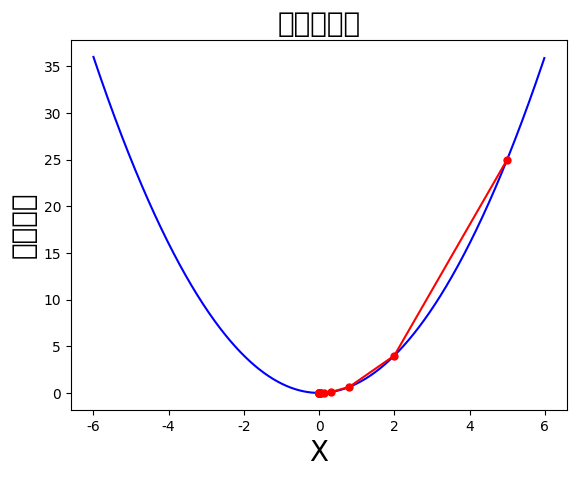

In [18]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

# 目標函數(損失函數):y=x^2
def func(x): return x ** 2

# 目標函數的一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 

# 梯度下降法 
def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # 更新 x_new = x — learning_rate * gradient        
        x += - dx * lr         
        xs[i+1] = x    
    return xs

# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c='r', marker ='o', markersize=5)    

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 正黑體 
plt.rcParams['axes.unicode_minus'] = False # 矯正負號

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

## 使用 PyTorch

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

[5.   2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.   0.   0.   0.
 0.   0.  ]


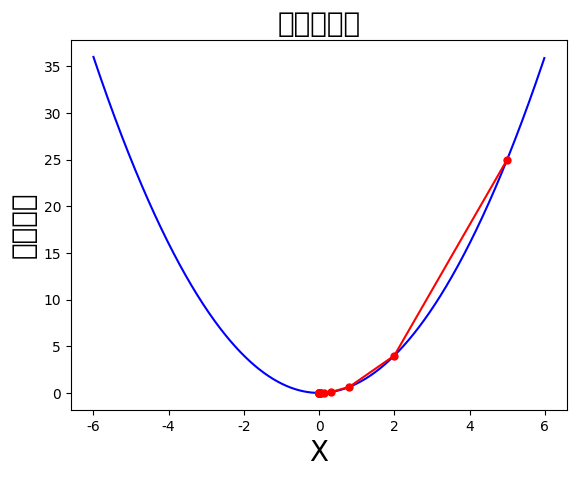

In [14]:
# 載入套件
import torch
import numpy as np
import matplotlib.pyplot as plt

# 目標函數(損失函數):y=x^2
def func(x): return x ** 2

# 自動微分
def dfunc(x): 
    x = torch.tensor(float(x), requires_grad=True)
    y = x ** 2 # 目標函數(損失函數)
    y.backward()
    return x.grad

# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 

# 梯度下降法 
def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # x更新 x_new = x — learning_rate * gradient        
        x += - dx * lr         
        xs[i+1] = x    
    return xs

# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c='r', marker ='o', markersize=5)    

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 正黑體 
plt.rcParams['axes.unicode_minus'] = False # 矯正負號

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

## 使用 TensorFlow

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

[5.   2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.   0.   0.   0.
 0.   0.  ]


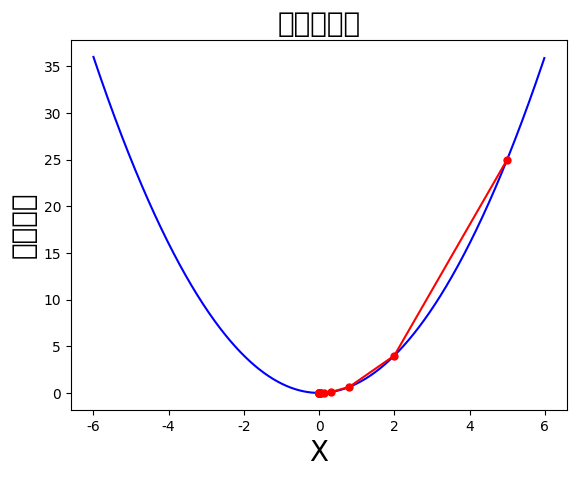

In [15]:
# 載入套件
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 目標函數(損失函數):y=x^2
def func(x): return x ** 2

# 自動微分
def dfunc(x_value): 
    x = tf.Variable(x_value, dtype=tf.float32) # 宣告 TensorFlow 變數(Variable)
    with tf.GradientTape() as g: # 自動微分
        y = x ** 2                # y = x^2
    dy_dx = g.gradient(y, x)     # 取得梯度
    return dy_dx.numpy()         # 轉成 NumPy array

# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 

# 梯度下降法 
def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # x更新 x_new = x — learning_rate * gradient        
        x += - dx * lr         
        xs[i+1] = x    
    return xs

# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c='r', marker ='o', markersize=5)    

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 正黑體 
plt.rcParams['axes.unicode_minus'] = False # 矯正負號

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft JhengHei
findfont: Generic family 'sans-serif' not found because 

[5.   4.03 3.53 ... 0.51 0.51 0.51]


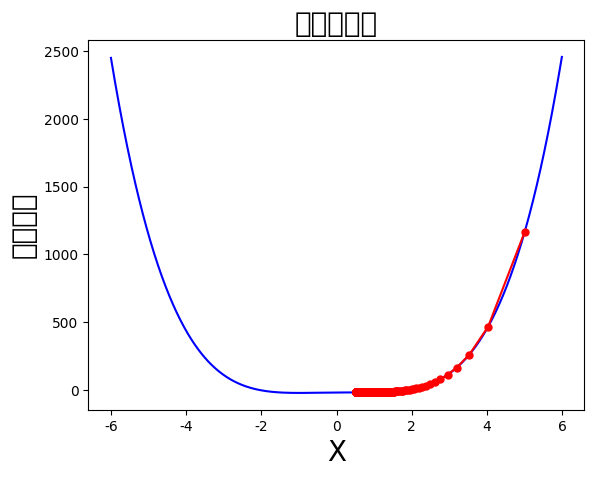

In [16]:
# 損失函數
def func(x): return 2*x**4-3*x**2+2*x-20

# 自動微分
def dfunc(x): 
    x = torch.tensor(float(x), requires_grad=True)
    y = 2*x**4-3*x**2+2*x-20
    y.backward()
    return x.grad

# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 15000  # 執行週期數 
lr = 0.001      # 學習率 

# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c='r', marker ='o', markersize=5)    

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 正黑體 
plt.rcParams['axes.unicode_minus'] = False # 矯正負號

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

In [20]:
def dfunc(x): 
    x = torch.tensor(float(x), requires_grad=True)
    y = x ** 2 # 目標函數(損失函數)
    y.backward()
    return x.grad
print(x)
print(dfunc(x**2))

tensor(5., requires_grad=True)
tensor(50.)
